In [91]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import numpy as np

In [92]:
df = pd.read_csv('data/labelled_dataset.csv')
df_raw = pd.read_csv('data/consolidated.csv')
df_raw["length"] = df_raw["Text"].apply(lambda x: len(x.split()))

In [93]:
# # generate 5 random numbers
# import random
# random.seed(87)
# random_numbers = random.sample(range(0, len(df[df["Best Topic"] == 10])), 5)

# for number in random_numbers:
#     print(df[df["Best Topic"] == 10].iloc[number]["Raw"])
#     print()

In [94]:
stopwords=["philippine", "inflation", "yung", "rin", "kay", "yung", "wag", "nyo", "eh", "like"]
def preview_wordcloud(df,title):
    text = " ".join(cat for cat in df["Text"])
    word_cloud = WordCloud(collocations = False, background_color = 'white', min_font_size=5, width=800, height=400, stopwords=stopwords).generate(text)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

In [95]:
platforms = ["Reddit", "Tiktok", "Facebook", "Youtube"]
mean_lengths = []
topics = [i+1 for i in range(df['Best Topic'].nunique())]
# topics = [1, 2, 3, 4, 5, 6,7,8,9,10]
topics

[1, 2, 3, 4, 5, 6]

In [96]:
for platform in platforms:
    mean = np.mean(df_raw[df_raw["Platform"] == platform]["length"])
    mean_lengths.append(mean)
    print(f"Mean length of {platform} posts: {mean}")

Mean length of Reddit posts: 96.78784336645236
Mean length of Tiktok posts: 12.220232766338407
Mean length of Facebook posts: 12.529154518950437
Mean length of Youtube posts: 19.834489593657086


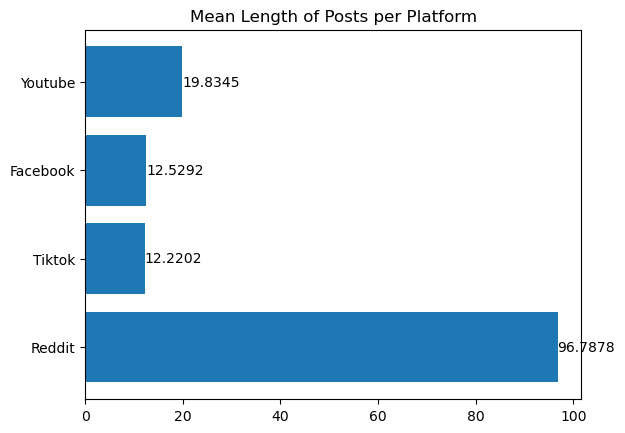

In [97]:
fig, ax = plt.subplots()
bars = ax.barh(platforms, mean_lengths)
ax.bar_label(bars)
plt.title("Mean Length of Posts per Platform")
plt.show()

In [98]:
def preview_pie(series, platform):
    labels = topics
    sizes = series["Best Topic"].value_counts().values
    x, ax1 = plt.subplots()
    print(labels)
    print(sizes)
    print(len(sizes)==len(labels))
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal') 
    plt.title(f"Percentage of topics in {platform}")
    plt.show()

In [99]:
df.shape

(4696, 10)

[1, 2, 3, 4, 5, 6]
[487 440 205 168 159 107]
True


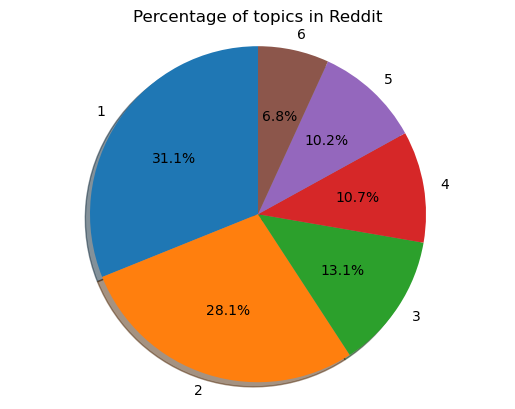

[1, 2, 3, 4, 5, 6]
[202 200 200 191 137  58]
True


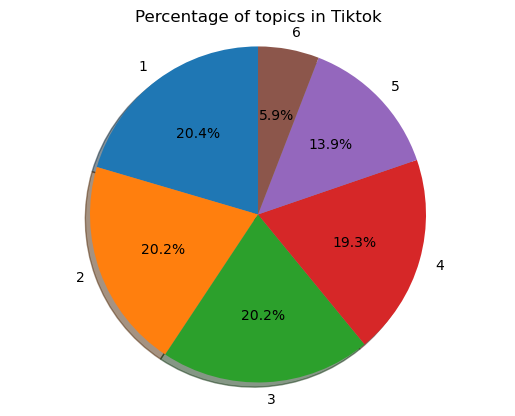

[1, 2, 3, 4, 5, 6]
[388 266 224 143 128  40]
True


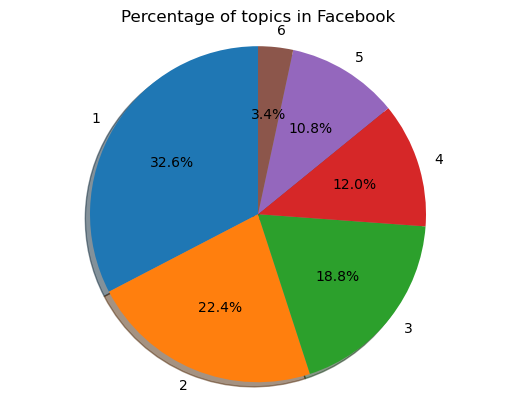

[1, 2, 3, 4, 5, 6]
[236 204 176 164 125  48]
True


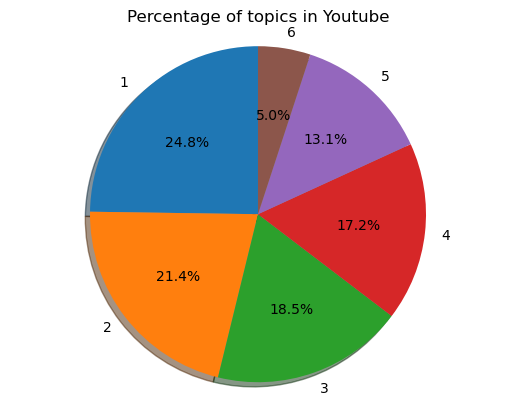

[1, 2, 3, 4, 5, 6]
[994 994 881 829 647 351]
True


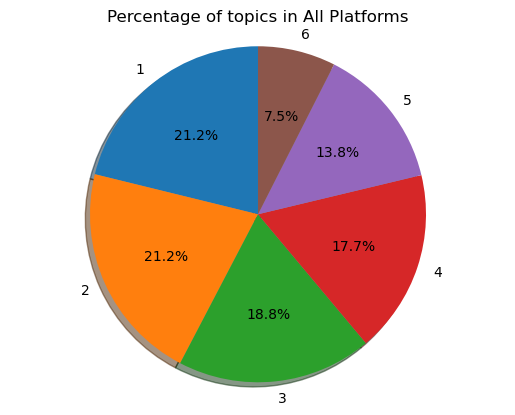

In [100]:
for platform in platforms:
    preview_pie(df[df["Platform"] == platform], platform)
preview_pie(df, "All Platforms")

In [101]:
len(df_raw)

5209

In [102]:
df_raw["Platform"].value_counts()

Reddit      1711
Facebook    1372
Tiktok      1117
Youtube     1009
Name: Platform, dtype: int64

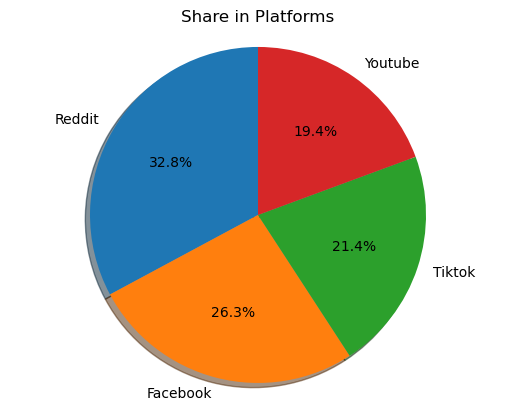

In [103]:
labels = df_raw["Platform"].value_counts().keys()
sizes = df_raw["Platform"].value_counts().values
x, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 
plt.title(f"Share in Platforms")
plt.show()

In [104]:
df_raw.duplicated().sum()

72

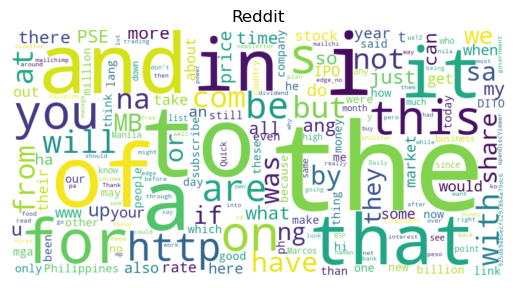

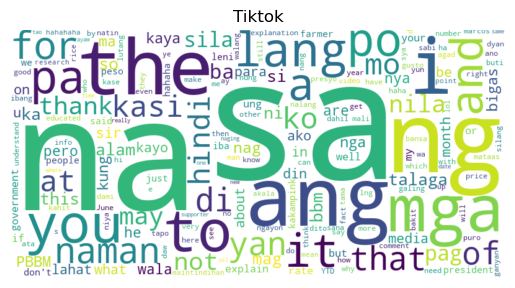

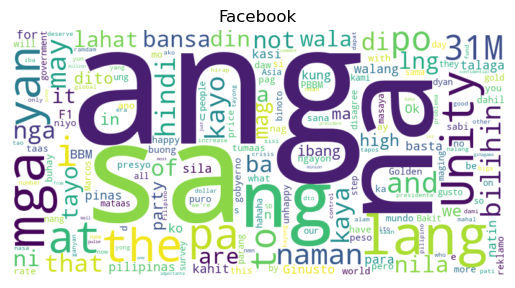

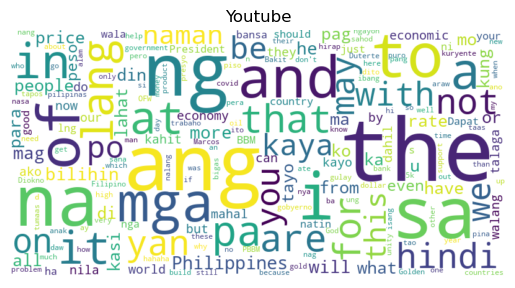

In [105]:
for platform in platforms:
    preview_wordcloud(df_raw[df_raw["Platform"] == platform], platform)

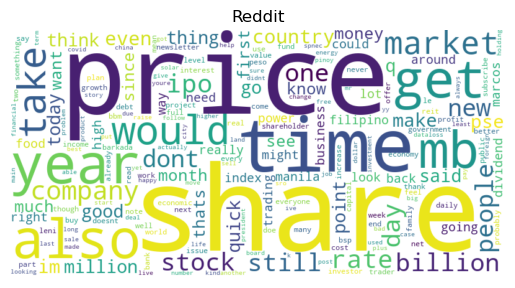

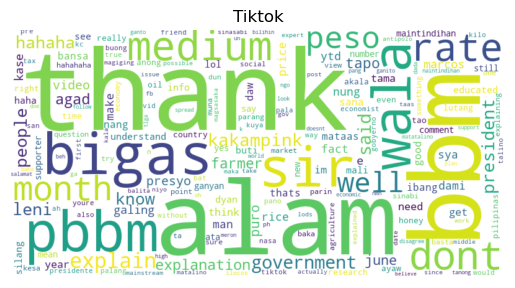

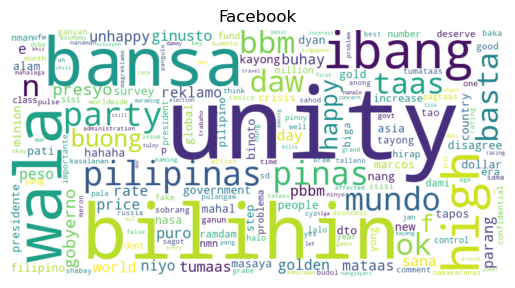

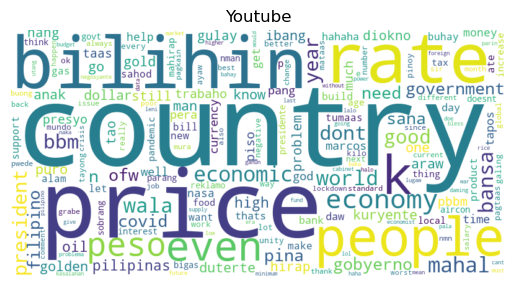

In [106]:
for platform in platforms:
    preview_wordcloud(df[df["Platform"] == platform], platform)

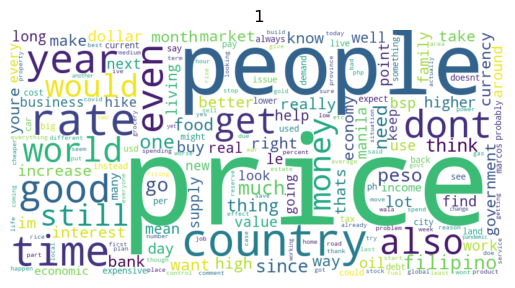

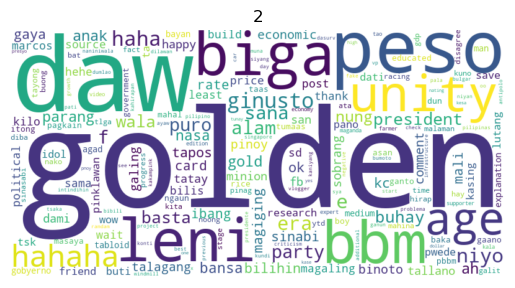

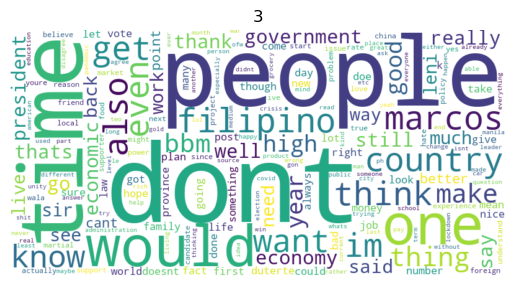

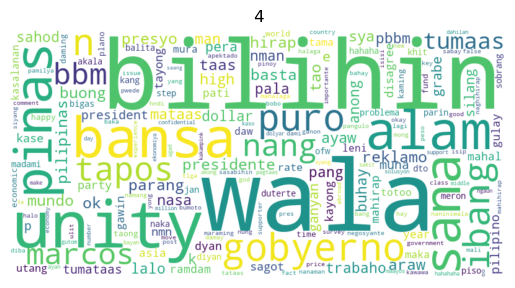

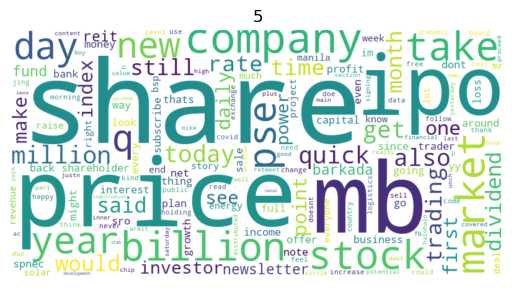

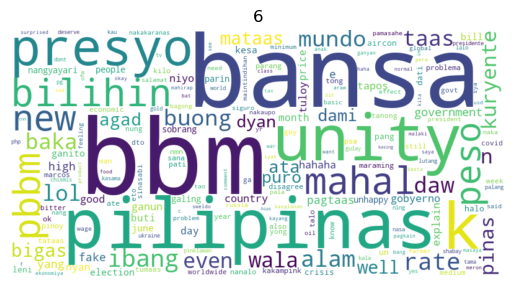

In [107]:
for topic in topics:
    preview_wordcloud(df[df["Best Topic"] == topic], topic)